1. Neural Network - Multiclass Classification

In [29]:
import numpy as np
import scipy.io
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.misc

In [30]:
data = scipy.io.loadmat('ex3data1.mat')

In [31]:
X = data['X']
y = data['y'].astype(np.int64) 
# It's important to set y.dtype to int64, if it's int8, could cause negative cost function

In [32]:
y.shape

(5000, 1)

In [33]:
type(y)

numpy.ndarray

In [34]:
def displayData(data, num = 100):
    '''
    Input: data is the X matrix with m examples and n pixels
    '''
    np.random.seed(13)
    random_rows = np.random.randint(0, 5000, num)
    sample = data[[random_rows]]
    m = math.sqrt(num)
    n = math.sqrt(num)
    i = 0
    j = 0
    big_matrix = np.zeros((200,200))
    while i < m:
        j = 0
        while j < n:
            s = sample[10*i+j].reshape((20,20)).T
            big_matrix[i*20: i*20+20,j*20: j*20+20] = s
            j += 1
        i += 1
    big_img = big_matrix.flatten().reshape((200, 200))
    fig = plt.figure(figsize=(6,6))
    plt.imshow(big_img,cmap = cm.Greys_r)

        




c:\Users\Windows\anaconda3\envs\enzo1\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


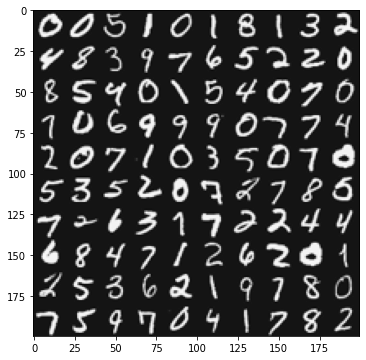

In [35]:
displayData(X)

In [36]:
from scipy.special import expit

def lrCostFunction(X, y, theta, lam = 0):
    '''
    X.shape =  (5000, 400)
    y.shape = (5000, 1)
    theta.shape = (400, 1)
    '''
    m = X.shape[0]# m = 5000
    z = np.dot(X, theta) # z.shape = (5000, 1)
    h = expit(z) # h.shape(5000, 1)
    #h = 1/(1+np.exp(-z))
    h = h.reshape((-1,1))
    
    term1 = np.dot(-y.T, np.log(h)) # term1.shape 1D
    term2 = np.dot((1-y).T, np.log((1-h))) # term2.shape 1D
    reg_term = lam/2*(np.dot(theta[1:].T, theta[1:])) #reg_term.shape 1D
    loss = 1/m*np.sum(term1 - term2 - reg_term)
    # loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return float(loss)

In [37]:
def computeGradient(X, y, theta, lam = 0):
    '''
    X.shape =  (5000, 400)
    y.shape = (5000, 1)
    theta.shape = (400, 1)
    '''
    m = X.shape[0] # m = 5000
    z = np.dot(X, theta) # z.shape = (5000, 1)
    h = 1/(1 + np.exp(-z)) # h.shape(5000, 1)
    h = h.reshape((-1, 1))
    beta = h-y
    t0 = np.sum((h-y))/m
    t1 = np.dot(X[:, 1:].T, (h - y))/m # t1.shape (401,1)
    reg_t = lam/m*theta[1:] # reg_t.shape(400,1)
    reg_t = reg_t.reshape((-1,1))
    g1 = t1+reg_t
    g1 = g1.flatten()
    gradient = np.insert(g1, 0, t0)
    gradient = gradient.reshape((401, 1))
    return gradient

In [38]:
X = np.column_stack((np.ones(5000), X))
initial_theta = np.zeros((401, 1))
alpha = 0.01
iters = 1000


In [39]:
yy = y[:10]
yy = yy.flatten()
yy

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int64)

In [40]:
def GradientDescentReg(x, y, initial_theta, iterations, alpha = 0.01, lamb = 0):
    m = x.shape[0]
    loss_history = []
    theta_history = []
    theta = initial_theta
    for i in range(iterations):
        loss = lrCostFunction(x, y, theta)
        loss_history.append(loss)
        theta_history.append(theta)
        gradient = computeGradient(x, y, theta, lam = lamb)
        theta = theta - alpha*gradient

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {loss:.4f}")
    
    return theta_history[-1]


In [41]:
def GD(X, y, alpha, iterations, lam = 0):
    big_theta = np.zeros((10, 401))
    initial_theta = np.zeros((401,1))
    for i in range(10):
        theta = initial_theta
        ii = i + 1
        b = y==ii
        b = b.reshape(len(y==ii))
        xi = X[b]
        yi = y
        yi = np.where(b, 1,0).reshape(-1,1)
        # print(lrCostFunction(X,y,big_theta[0],0))
        thetai = GradientDescentReg(X, yi, theta, iterations=iterations, alpha = alpha, lamb = lam)
        big_theta[i] = thetai.flatten()
    return big_theta


In [42]:
big_theta = GD(X, y, alpha= 0.05, iterations=10000, lam=0)


Iteration 0: Cost = 0.6931
Iteration 100: Cost = 0.1310
Iteration 200: Cost = 0.0952
Iteration 300: Cost = 0.0796
Iteration 400: Cost = 0.0706
Iteration 500: Cost = 0.0647
Iteration 600: Cost = 0.0605
Iteration 700: Cost = 0.0572
Iteration 800: Cost = 0.0546
Iteration 900: Cost = 0.0526
Iteration 1000: Cost = 0.0508
Iteration 1100: Cost = 0.0493
Iteration 1200: Cost = 0.0480
Iteration 1300: Cost = 0.0469
Iteration 1400: Cost = 0.0459
Iteration 1500: Cost = 0.0451
Iteration 1600: Cost = 0.0443
Iteration 1700: Cost = 0.0436
Iteration 1800: Cost = 0.0429
Iteration 1900: Cost = 0.0423
Iteration 2000: Cost = 0.0418
Iteration 2100: Cost = 0.0413
Iteration 2200: Cost = 0.0408
Iteration 2300: Cost = 0.0404
Iteration 2400: Cost = 0.0399
Iteration 2500: Cost = 0.0396
Iteration 2600: Cost = 0.0392
Iteration 2700: Cost = 0.0389
Iteration 2800: Cost = 0.0386
Iteration 2900: Cost = 0.0382
Iteration 3000: Cost = 0.0380
Iteration 3100: Cost = 0.0377
Iteration 3200: Cost = 0.0374
Iteration 3300: Cost =

In [43]:
big_theta.shape

(10, 401)

In [44]:
def predict(X, theta):
    z = np.dot(X, theta.T)
    yhat = 1/(1+np.exp(-z)) # yhat has 10 columns
    if len(X.shape) == 1:
        output = np.argmax(yhat) + 1
    else:
        max_indixes = np.argmax(yhat, axis = 1)
        output = max_indixes.reshape(-1, 1)
        output += 1
    return output

def accuracy(X, theta, y):
    yhat = predict(X, theta)
    m = yhat.shape[0]
    score = 0
    for ind, value in enumerate(list(yhat.flatten())):
        if value == int(y[ind]):
            score += 1
    return score/m



10
[10]


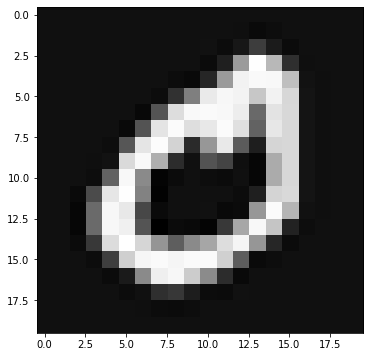

In [52]:
i = 1
yhat = predict(X[i], big_theta) # yhat has 10 columns
print(yhat)
print(y[i])
big_img = X[i][1:].flatten().reshape((20, 20)).T
fig = plt.figure(figsize=(6,6))
plt.imshow(big_img,cmap = cm.Greys_r)

In [46]:
acc = accuracy(X, big_theta, y)
print(acc)

0.9214


2. Feedforward Propagation Neural Network

In [47]:
weights = scipy.io.loadmat('ex3weights.mat')

In [48]:
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

In [28]:
print(Theta1.shape)
print(Theta2.shape)

(25, 401)
(10, 26)


In [49]:
print(X.shape)
print(y.shape)


(5000, 401)
(5000, 1)


In [51]:
int(y[1])

10

In [60]:
def ForwardPropagation(X, theta1, theta2):
    m = X.shape[0]
    HiddenLayer = expit(X @ theta1.T)
    HiddenLayer = np.column_stack((np.ones(m), HiddenLayer))
    OutputLayer = expit(HiddenLayer @ theta2.T)
    return OutputLayer

def predict(X, t1, t2):
    yhat = ForwardPropagation(X, t1, t2)
    prediction = np.argmax(yhat, axis = 1)
    prediction += 1
    return prediction

def NN_accuracy(yhat, y):
    m = len(y)
    score = 0
    for i,value in enumerate(yhat.flatten()):
        if value == y[i]:
            score += 1
    return score/m
        

In [61]:
predictions = predict(X, Theta1, Theta2)

In [62]:
NN_accuracy(predictions, y)

0.9752